In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sklearn
from scipy import ndimage, misc
import math
%matplotlib inline
import cv2
import time
import glob

img_list = []
filenamelist= []
for img in glob.glob("0518ALL_Data/0521_CCD-4_new/*.jpg"):
    #img_list.append(cv2.imread(img,0))
    filenamelist.append(img)
np.array(filenamelist).shape


Bad key "text.kerning_factor" on line 4 in
C:\Users\Chernger\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


(246,)

In [3]:
def nothing(x):
    pass

0525_images\CCD-4\2.jpg
Area:  776275.5
Area:  551034.5
179.0
262.0
271.5
842.0
33.0
16.0
264.0
28.0
16.0
16.0
95.0
171.5
729.5
56.0
97.0
469.5
16.0
131.0


'\n# canny 參數\nGaussian 7*7|canny 130 210| 45.jpg\nGaussian 9*9|canny 100 210| 2.jpg\nGaussian 7*7|canny 130 200| 3.jpg\nGaussian 7*7|canny(image,80,240,3)|1.jpg\nGaussian 7*7|canny(image,140,250,3)|2.jpg\nGaussian 7*5|canny(image,140,250,3)|2.jpg\nGaussian 7*5|canny(image,140,220,3)|29.jpg # if (hierarchy[0][i][3] >= 0):\nGaussian 7*7|canny(image,140,220,3)|29.jpg 1.jpg 2.jpg | 20 21\nGaussian 13*13|canny(image,32,110,3)|\nGaussian 13*13|canny(image,60,100,3)|\nGaussian 7*7|canny(image,80,220,3)|\n'

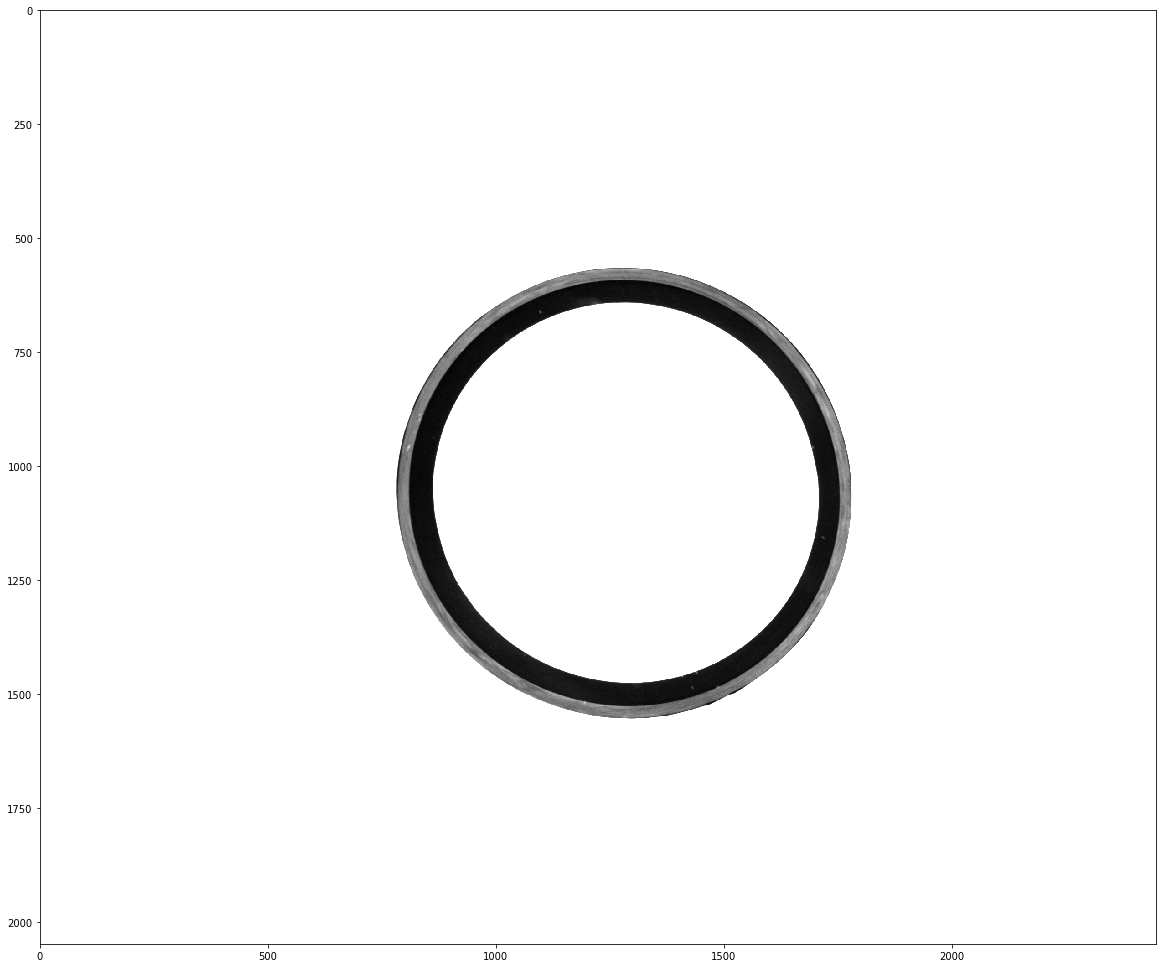

<Figure size 1440x1440 with 0 Axes>

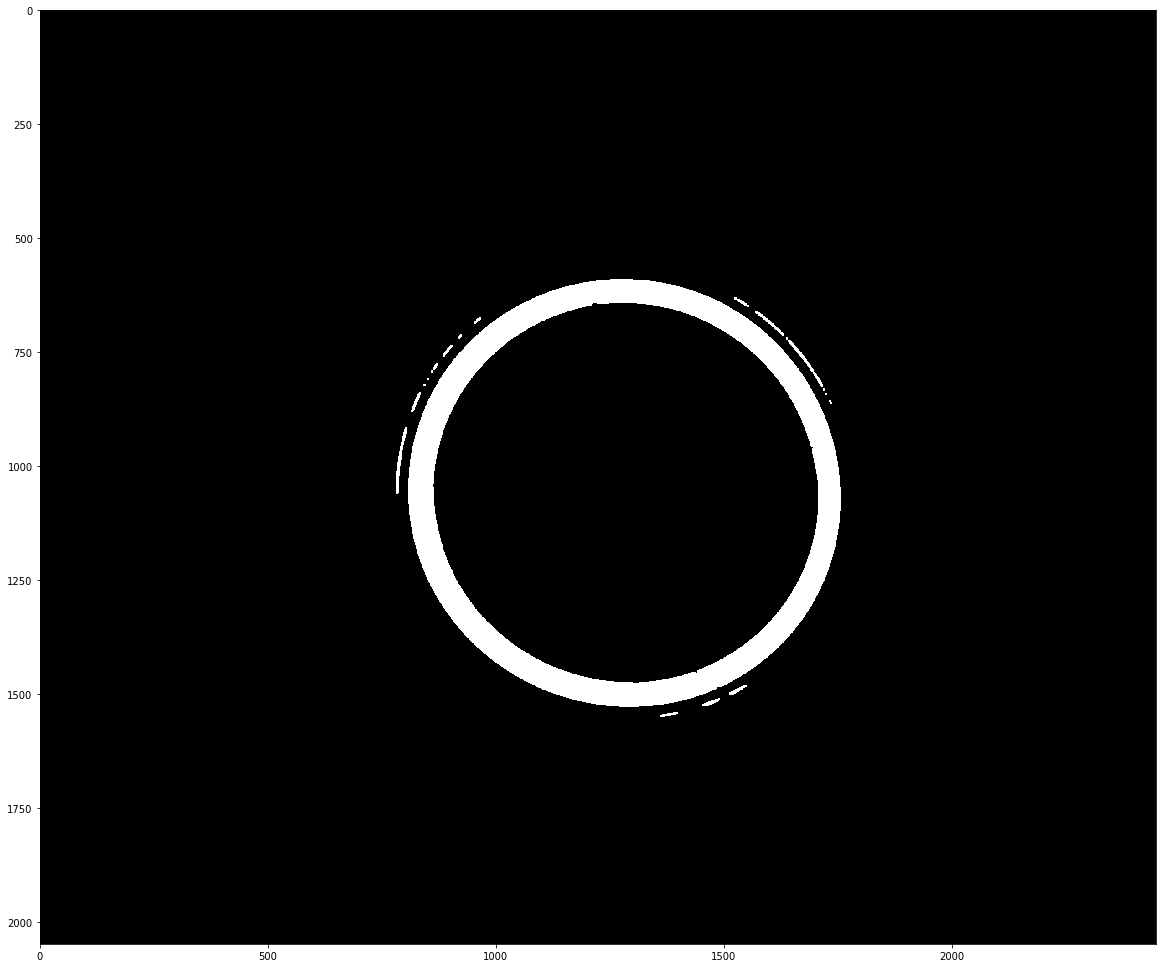

<Figure size 1440x1440 with 0 Axes>

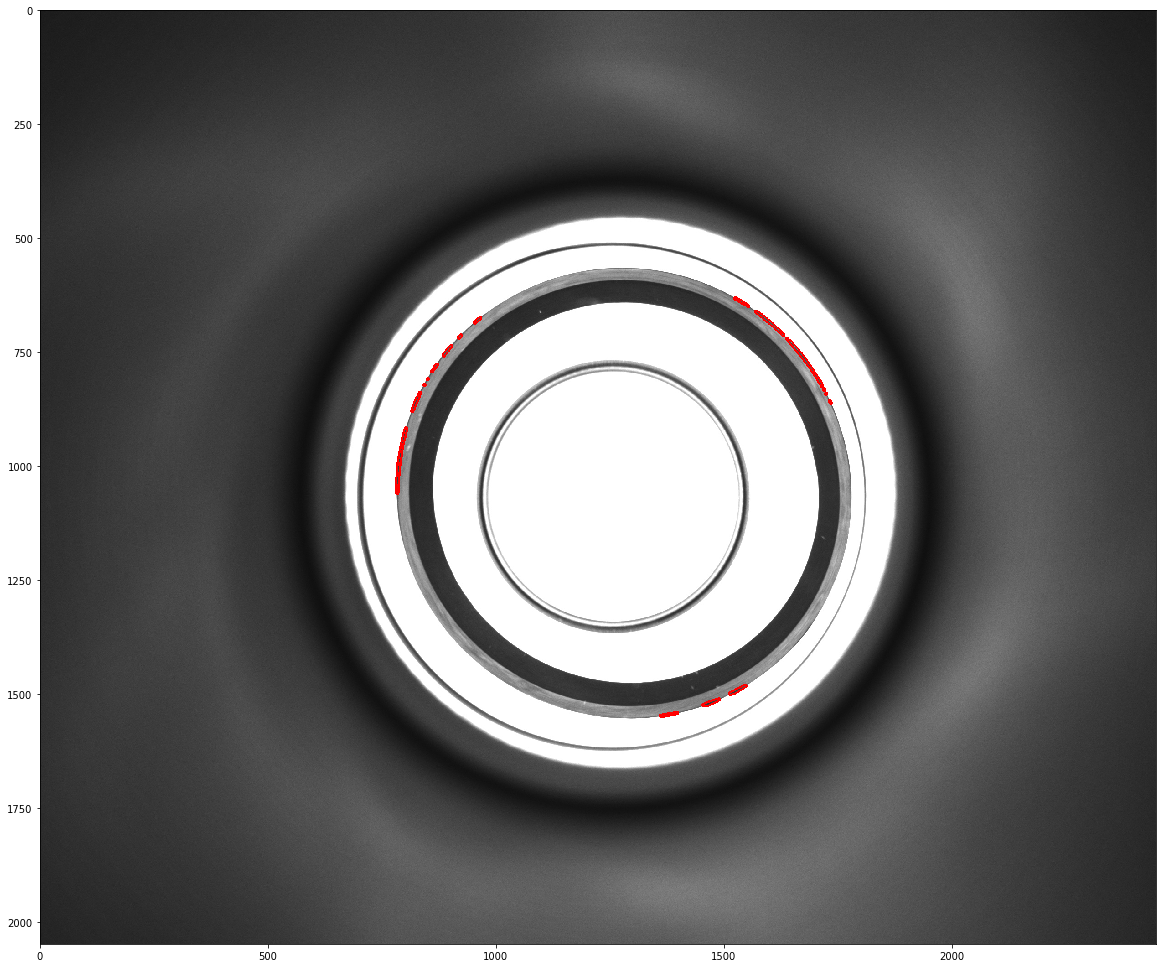

In [10]:
filename = '0525_images\\CCD-4\\2.jpg'
print(filename)
image = np.array(cv2.imread(filename,0))
backtorgb = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)


#=======================以下找出真正的O-ring

ret, thresh1 = cv2.threshold(image, 240, 255, cv2.THRESH_BINARY)

#plt.figure(figsize=(20,20))
#plt.imshow(thresh1,cmap = 'gray')

#find contours1
_ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


contours_final = []
approx_list = []
for i in range(np.array(contours).shape[0]):
        if(cv2.contourArea(contours[i])>300000 and cv2.contourArea(contours[i])<800000):
            contours_final.append(contours[i])
            #cv2.drawContours(backtorgb,contours[i],-1,(0,0,255),3)

            print("Area: ",cv2.contourArea(contours[i]))
            epsilon = 0.5# * cv2.arcLength(contours[i],True)
            approx = cv2.approxPolyDP(contours[i], epsilon, True)
            approx_list.append(approx)
            #cv2.polylines(backtorgb, [approx], True, (255, 0, 0), 2)
            
                
#plt.figure(figsize=(20,20))
#plt.imshow(backtorgb)

inner_contour_img = np.zeros_like(image)
cv2.drawContours(inner_contour_img, [approx_list[1]],-1,(255,255,255),-1)
inner_contour_img = 1 - inner_contour_img
#outer_contour_img = (outer_contour_img ==255).astype(int)

outer_contour_img = np.zeros_like(image)

cv2.drawContours(outer_contour_img, [approx_list[0]],-1,(255,255,255),-1)
outer_contour_img = 1 - outer_contour_img
#inner_contour_img = (inner_contour_img ==255).astype(int)

# for below delete contour after algorithm
delete_contour_img = np.zeros_like(image)
cv2.drawContours(delete_contour_img, [approx_list[0]],-1,(255,255,255),3)

#outer - inner
oringmask = outer_contour_img- inner_contour_img
#plt.figure(figsize=(20,20))
#plt.imshow(oringmask,cmap = 'gray')

mask_image = oringmask*image
#mask_image = 1 - mask_image
image[oringmask != 1] =255
plt.figure(figsize=(20,20))
plt.imshow(image,cmap = 'gray')




ret, thresh1 = cv2.threshold(image, 80, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(20,20))
plt.imsave('stop4_step2.jpg',thresh1,cmap='gray')

kernel = np.ones((5,5),np.uint8)  
thresh1 = cv2.dilate(thresh1,kernel,iterations = 1)

plt.figure(figsize=(20,20))
plt.imshow(thresh1,cmap = 'gray')

plt.figure(figsize=(20,20))
plt.imsave('stop4_step3.jpg',thresh1,cmap='gray')

_ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
inner_contours_final = []
approx_list = []
index = []
for i in range(np.array(contours).shape[0]):
    #if (hierarchy[0][i][3] >= 0):
        if(cv2.contourArea(contours[i])<20000 and cv2.contourArea(contours[i])>= 0):
            #cv2.drawContours(backtorgb, contours, i, (0, 255, 0), 1, 8);
            #inner_contours_final.append(contours[i])
            epsilon = 0.0000# * cv2.arcLength(contours[i],True)
            index.append(i)
            approx = cv2.approxPolyDP(contours[i], epsilon, False)
            print(cv2.contourArea(approx))
            approx_list.append(approx)
            #print(np.array(approx_list).shape)
            cv2.polylines(backtorgb, [approx], True, (255,0, 0), 3)

            
plt.figure(figsize=(20,20))
plt.imshow(backtorgb)


'''
#==============================================用canny找出輪廓=============================================
image = cv2.blur(image,(3,3))
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
image = cv2.filter2D(image, -1, kernel)
#plt.imsave("stop4_temp.jpg",image,cmap = 'gray')

image = cv2.GaussianBlur(image,(7,7),0,0)

image = cv2.Canny(image,50,220,3)
  

plt.figure(figsize=(20,20))
plt.imshow(image,cmap = 'gray')
#==============================================用findcontours把canny得到的 ROI切出來=======================================

_ , contours, hierarchy = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
inner_contours_final = []
approx_list = []
index = []
for i in range(np.array(contours).shape[0]):
    #if (hierarchy[0][i][3] >= 0):
        if(cv2.contourArea(contours[i])<700):
            #cv2.drawContours(backtorgb, contours, i, (0, 255, 0), 1, 8);
            #inner_contours_final.append(contours[i])
            epsilon = 0.0000# * cv2.arcLength(contours[i],True)
            index.append(i)
            approx = cv2.approxPolyDP(contours[i], epsilon, False)
            print(cv2.contourArea(approx))
            approx_list.append(approx)
            #print(np.array(approx_list).shape)
            cv2.polylines(backtorgb, [approx], True, (255,0, 0), 3)

            
plt.figure(figsize=(20,20))
plt.imshow(backtorgb)
'''
'''
# canny 參數
Gaussian 7*7|canny 130 210| 45.jpg
Gaussian 9*9|canny 100 210| 2.jpg
Gaussian 7*7|canny 130 200| 3.jpg
Gaussian 7*7|canny(image,80,240,3)|1.jpg
Gaussian 7*7|canny(image,140,250,3)|2.jpg
Gaussian 7*5|canny(image,140,250,3)|2.jpg
Gaussian 7*5|canny(image,140,220,3)|29.jpg # if (hierarchy[0][i][3] >= 0):
Gaussian 7*7|canny(image,140,220,3)|29.jpg 1.jpg 2.jpg | 20 21
Gaussian 13*13|canny(image,32,110,3)|
Gaussian 13*13|canny(image,60,100,3)|
Gaussian 7*7|canny(image,80,220,3)|
'''

Area:  776101.0
Area:  775284.0
Area:  694116.5
Area:  693349.0
Area:  554022.0
Area:  553332.0


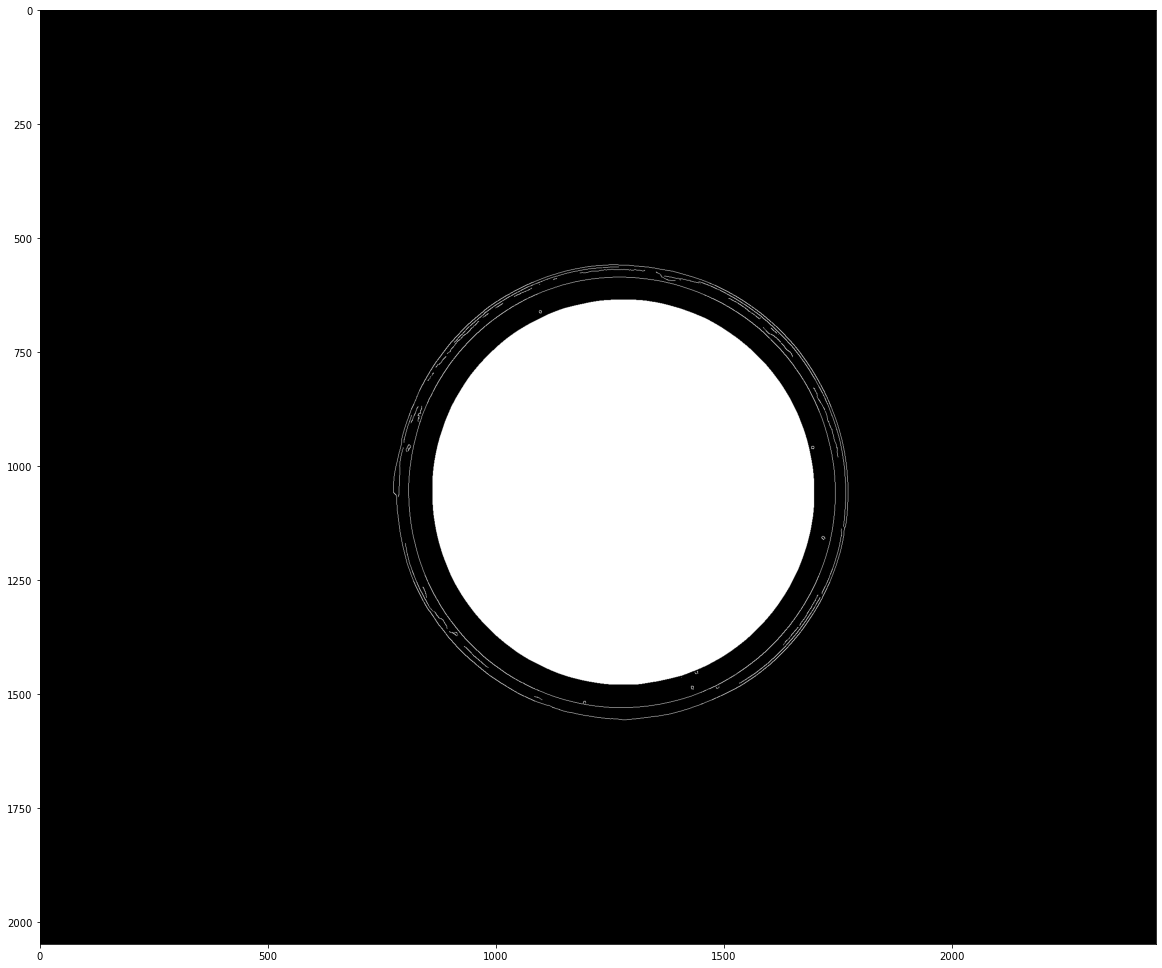

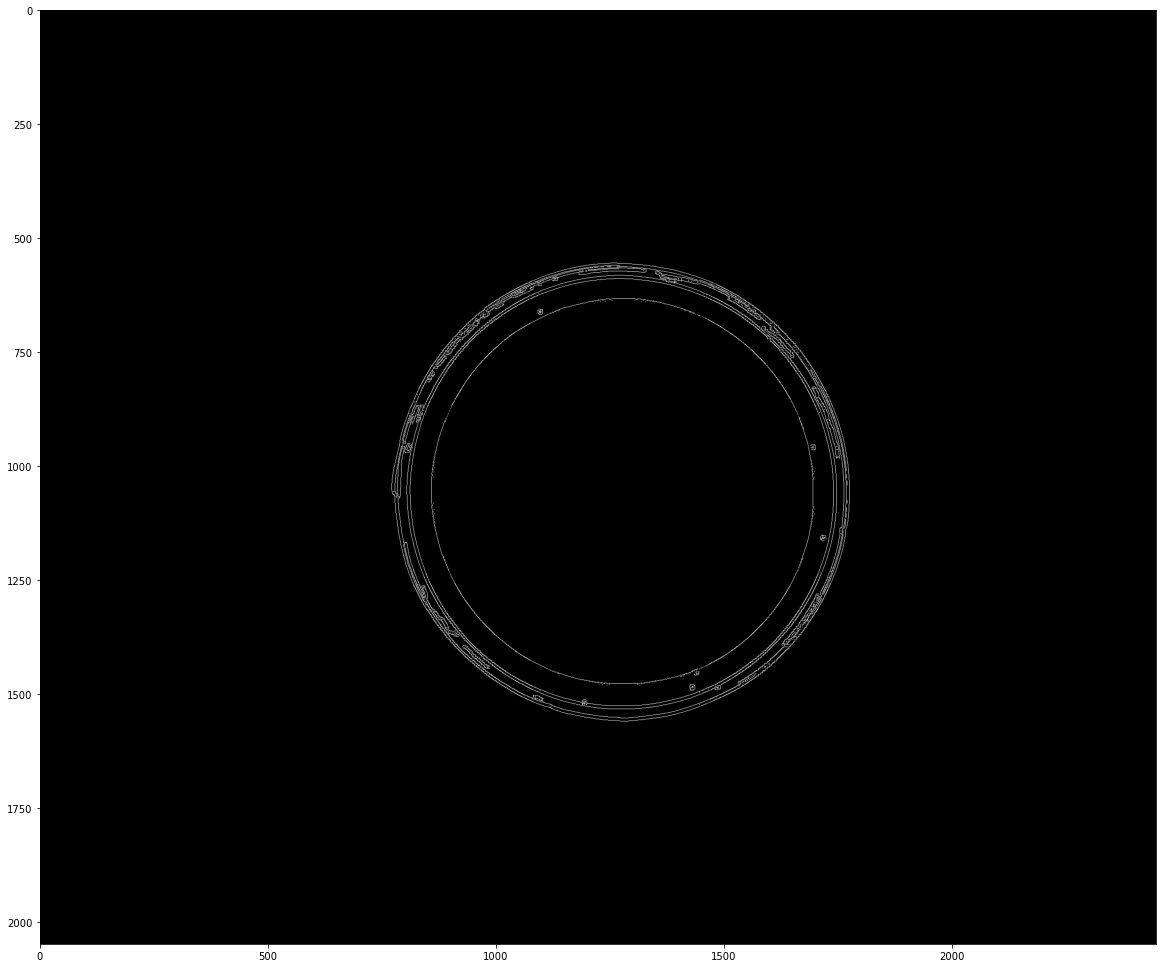

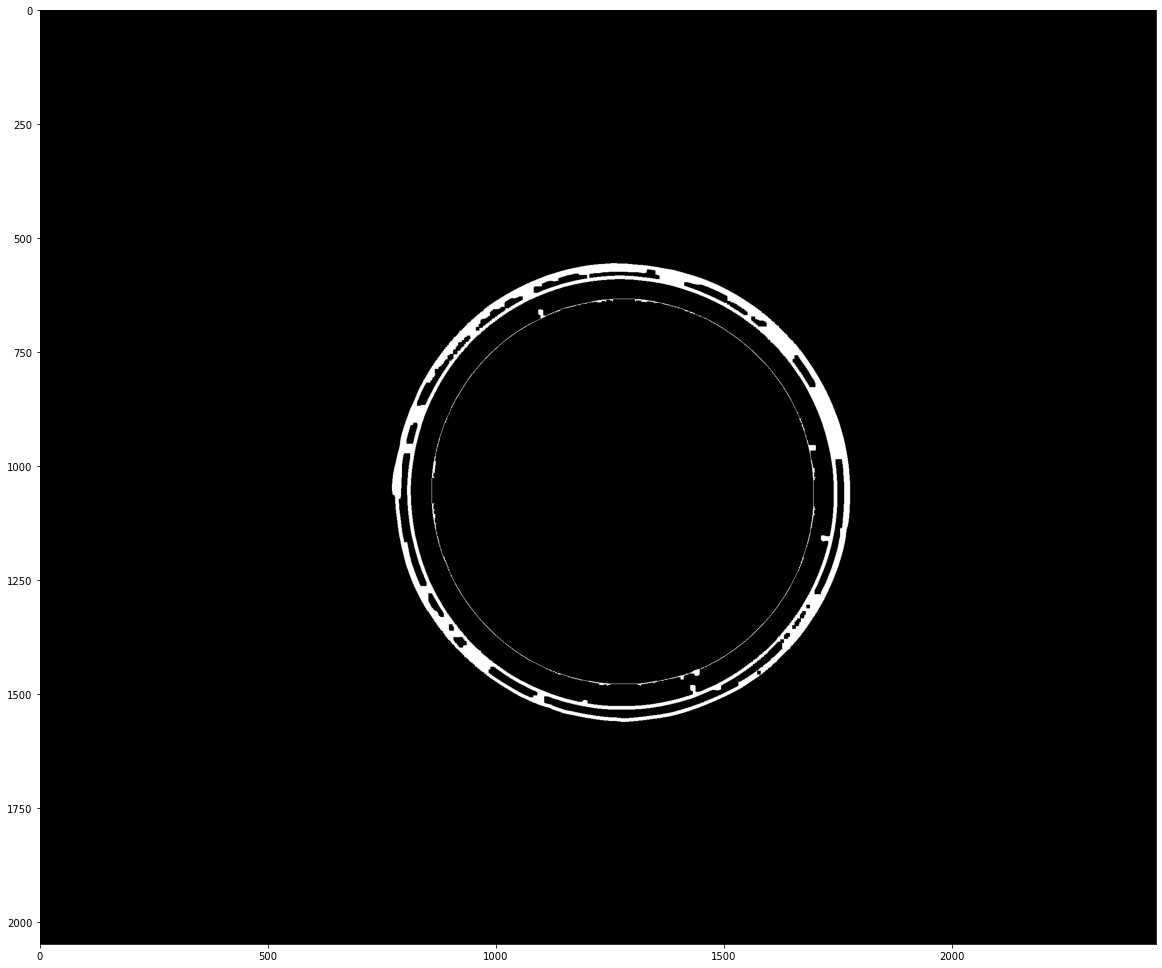

In [5]:

#=======================以上找出真正的O-ring
backtorgb_mask = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)

ret, thresh1 = cv2.threshold(image, 30, 255, cv2.THRESH_BINARY)
#plt.figure(figsize=(20,20))
#plt.imshow(thresh1,cmap = 'gray')

#find contours1
_ , contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


contours_final = []
approx_list = []
for i in range(np.array(contours).shape[0]):
        if(cv2.contourArea(contours[i])>300000 and cv2.contourArea(contours[i])<800000):
            contours_final.append(contours[i])
            #cv2.drawContours(backtorgb_mask,contours[i],-1,(0,0,255),3)

            print("Area: ",cv2.contourArea(contours[i]))
            epsilon = 0.5# * cv2.arcLength(contours[i],True)
            approx = cv2.convexHull(contours[i], epsilon, True)
            approx_list.append(approx)
            #cv2.polylines(backtorgb_mask, [approx], True, (255, 0, 0), 2)
            
                
#plt.figure(figsize=(20,20))
#plt.imshow(backtorgb_mask)

# 第二小的圓圈裡面都設為0
black_contour_mask = np.zeros_like(image)
cv2.drawContours(black_contour_mask, [approx_list[-2]],-1,(255,255,255),-1)


black_contour_mask = 1 - black_contour_mask
image[black_contour_mask != 1] =255
#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#image = cv2.filter2D(image, -1, kernel)

#ret, thresh1 = cv2.threshold(image, 60,1,cv2.THRESH_BINARY)
'''
ret, thresh1 = cv2.threshold(image, 35,1,cv2.THRESH_BINARY)
thresh1 = 1 - thresh1 #toggle
'''
#plt.imsave('s4.jpg',image,cmap = 'gray')

plt.figure(figsize=(20,20))
plt.imshow(image,cmap = 'gray')

#最後把特別暗的地方畫出來(用threshold + opening)
image = cv2.blur(image,(7,7))
#ret, thresh1 = cv2.threshold(image, 25, 1, cv2.THRESH_TRIANGLE+cv2.THRESH_BINARY)

#thresh1 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3, 0)
#thresh1 = cv2.GaussianBlur(thresh1,(5,5),0,0)

#ret, thresh1 = cv2.threshold(image,30, 1,cv2.THRESH_BINARY)
image = cv2.Canny(image,20,28)
#image = thresh1*image
plt.figure(figsize=(20,20))
plt.imshow(image,cmap = 'gray')



close_kernel = np.ones((8,8),np.uint8)
image_close1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, close_kernel)


#close_kernel = np.ones((5,5),np.uint8)
#image = cv2.morphologyEx(image, cv2.MORPH_OPEN, close_kernel)

plt.figure(figsize=(20,20))
plt.imshow(image_close1,cmap ='gray')

#====================================find contour======================================
#cv2.drawContours(delete_contour_img, [approx_list[-2]],-1,(255,255,255),3)
#plt.figure(figsize=(20,20))
#plt.imshow(delete_contour_img,cmap = 'gray')

                
#plt.figure(figsize=(20,20))
#plt.imshow(image_close1 - delete_contour_img,cmap = 'gray')


In [22]:
檢查第一站mask有沒有錯

NameError: name '檢查第一站mask有沒有錯' is not defined